In [1]:
# Read the dataset from the below link:
# https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

titanic = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


sex
female    466
male      843
dtype: int64


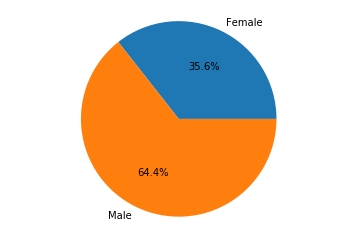

In [2]:
# Create a pie chart presenting the male/female proportion

n=titanic.groupby("sex").size()
print(n)
plt.pie(n,labels=["Female","Male"],autopct="%1.1f%%")
plt.axis("equal")
plt.show()

Text(0, 0.5, 'Fare')

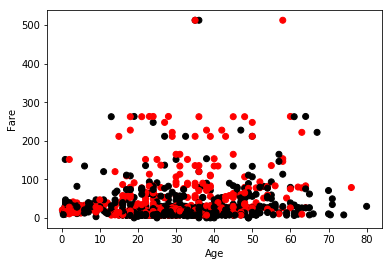

In [3]:
# Create a scatterplot with the Fare paid and the Age, differ the plot color by gender.

m=titanic["age"]
n=titanic["fare"]
titanic = titanic.dropna(subset=["sex"])
mapping = {"male":"black","female":"red"}
plt.scatter(titanic["age"],titanic["fare"],c=titanic["sex"].map(mapping))
plt.xlabel("Age")
plt.ylabel("Fare")

In [4]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [5]:
# Fill in the missing values in the FlightNumber column (10055 and 10075) and make the column an integer column

df['FlightNumber']=df['FlightNumber'].interpolate().astype(int)
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


In [6]:
# Split the From_To column into two separate columns of a temporary DataFrame

temp=pd.DataFrame(columns=["From","To"])
temp[["From","To"]]=df["From_To"].str.split("_",expand=True)
temp

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


In [7]:
# Correct the capitalisation and standardise the strings so that only the first letter is uppercase.

temp.From=temp.From.str.capitalize()
temp.To=temp.To.str.capitalize()
temp

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


In [8]:
# Delete From_To column from df and attach the temporary DataFrame from the previous questions.

del df["From_To"]
df=temp.join(df)
df

,From,To,FlightNumber,RecentDelays,Airline
0,London,Paris,10045,"[23, 47]",KLM(!)
1,Madrid,Milan,10055,[],<Air France> (12)
2,London,Stockholm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest,Paris,10075,[13],12. Air France
4,Brussels,London,10085,"[67, 32]","""Swiss Air"""


In [9]:
# In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't a Nth value, The value should be NaN.
# Expand the series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc.

delay=pd.DataFrame(df["RecentDelays"].values.tolist(),columns=["delay_1","delay_2","delay_3"])
delay

,delay_1,delay_2,delay_3
0,23.0,47.0,NaN
1,NaN,NaN,NaN
2,24.0,43.0,87.0
3,13.0,NaN,NaN
4,67.0,32.0,NaN


In [10]:
# Replace the unwanted RecentDelays column in df with delays

del df["RecentDelays"]
df=pd.concat([df,delay],axis=1)
df=df[["From","To","FlightNumber","delay_1","delay_2","delay_3","Airline"]]
df

,From,To,FlightNumber,delay_1,delay_2,delay_3,Airline
0,London,Paris,10045,23.0,47.0,NaN,KLM(!)
1,Madrid,Milan,10055,NaN,NaN,NaN,<Air France> (12)
2,London,Stockholm,10065,24.0,43.0,87.0,(British Airways. )
3,Budapest,Paris,10075,13.0,NaN,NaN,12. Air France
4,Brussels,London,10085,67.0,32.0,NaN,"""Swiss Air"""
